# Deep Learning CS6073 Assignment 9
    Akhil Devarashetti
    04/07/2020

### Question
    Run DL2.py (Module 1/29/2020) with MNIST and then replace the optimizer SGD with three of the following six
    and run and report the accuracy reached in the same number of epochs.
    (percentage of the 10000 test samples that are correctly classified)
    Also show the replacement code including hyperparameter values to the optimizers.
    
      - SGD with momentum
      - SGD with momemtum and nesterov is true
      - Adagrad
      - Adadelta
      - Adam
      - RMSprop

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
batch_size_train = 256
n_epochs = 10

In [3]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        './data/',
        train=True,
        download=True,
        transform=torchvision.transforms.ToTensor()
    ),
    batch_size=batch_size_train,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        './data/', 
        train=False, 
        download=True,
        transform=torchvision.transforms.ToTensor()
    )
)

test_size = len(test_loader.dataset)

In [4]:
model2 = nn.Sequential(
    nn.Linear(num_inputs, num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens, num_outputs))

loss_fn = nn.CrossEntropyLoss()

In [5]:
def train(optimizer):
    test_errors = []
    for epoch in range(n_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.reshape(-1, num_inputs)
            p = model2(data)
            train_loss = loss_fn(p, target)
            if batch_idx % 100 == 0:
                print('train', epoch, batch_idx, float(train_loss))
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        m = 0
        for batch_idx, (data, target) in enumerate(test_loader):
            data = data.reshape(-1, num_inputs)
            if int(torch.argmax(model2(data))) == int(target[0]):
                m = m + 1
        print("test", epoch, m, "among", test_size, "correctly classified")
        test_errors.append(m/test_size)
    return test_errors

In [6]:
def reset_params():
    for layer in model2.children():
        if hasattr(layer, 'reset_parameters'):
            print(f'Cleared params for layer: {layer}')
            layer.reset_parameters()

### Stochastic Gradient Descent optimizer

In [7]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-1)
sgd_errors = train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.2957279682159424
train 0 100 0.6139993667602539
train 0 200 0.3762021064758301
test 0 8969 among 10000 correctly classified
train 1 0 0.45420950651168823
train 1 100 0.30527395009994507
train 1 200 0.32435354590415955
test 1 9132 among 10000 correctly classified
train 2 0 0.3766746520996094
train 2 100 0.3262130618095398
train 2 200 0.28711000084877014
test 2 9226 among 10000 correctly classified
train 3 0 0.26782312989234924
train 3 100 0.24807144701480865
train 3 200 0.26181620359420776
test 3 9311 among 10000 correctly classified
train 4 0 0.24449099600315094
train 4 100 0.1856357306241989
train 4 200 0.1901005655527115
test 4 9365 among 10000 correctly classified
train 5 0 0.21271395683288574
train 5 100 0.22722841799259186
train 5 200 0.21694816648960114
test 5 9398 among 10000 correctly classified
train 6 0 0.1418

### Stochastic Gradient Descent with Momentum

In [8]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-2, momentum=0.5)
sgd_momentum_errors = train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.32192063331604
train 0 100 1.8517792224884033
train 0 200 1.1748988628387451
test 0 8155 among 10000 correctly classified
train 1 0 1.074642300605774
train 1 100 0.7981865406036377
train 1 200 0.6673791408538818
test 1 8663 among 10000 correctly classified
train 2 0 0.6211650967597961
train 2 100 0.5348968505859375
train 2 200 0.4724133312702179
test 2 8872 among 10000 correctly classified
train 3 0 0.44529178738594055
train 3 100 0.47144538164138794
train 3 200 0.38402122259140015
test 3 8935 among 10000 correctly classified
train 4 0 0.4317765235900879
train 4 100 0.40861016511917114
train 4 200 0.396884560585022
test 4 9001 among 10000 correctly classified
train 5 0 0.4174446165561676
train 5 100 0.4165913164615631
train 5 200 0.30413898825645447
test 5 9035 among 10000 correctly classified
train 6 0 0.41361355781555

### Stochastic Gradient Descent with Momentum and Nesterov

In [9]:
reset_params()
sgd = optim.SGD(model2.parameters(), 1e-2, momentum=0.5, nesterov=True)
sgd_momentum_nesterov_errors = train(sgd)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3045358657836914
train 0 100 1.7964586019515991
train 0 200 1.174868106842041
test 0 8115 among 10000 correctly classified
train 1 0 1.0330135822296143
train 1 100 0.8498351573944092
train 1 200 0.6088714003562927
test 1 8650 among 10000 correctly classified
train 2 0 0.5576141476631165
train 2 100 0.44274479150772095
train 2 200 0.5015881657600403
test 2 8875 among 10000 correctly classified
train 3 0 0.483882337808609
train 3 100 0.4634377360343933
train 3 200 0.43780165910720825
test 3 8952 among 10000 correctly classified
train 4 0 0.40536320209503174
train 4 100 0.36226364970207214
train 4 200 0.4466438889503479
test 4 9000 among 10000 correctly classified
train 5 0 0.34255701303482056
train 5 100 0.3715346157550812
train 5 200 0.368071585893631
test 5 9038 among 10000 correctly classified
train 6 0 0.4261061847209

### Adagrad

In [10]:
reset_params()
adagrad = optim.Adagrad(model2.parameters())
adagrad_errors = train(adagrad)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3210372924804688
train 0 100 0.30118176341056824
train 0 200 0.2300821840763092
test 0 9382 among 10000 correctly classified
train 1 0 0.25816774368286133
train 1 100 0.22435495257377625
train 1 200 0.21879467368125916
test 1 9521 among 10000 correctly classified
train 2 0 0.1576082855463028
train 2 100 0.13419687747955322
train 2 200 0.19969329237937927
test 2 9570 among 10000 correctly classified
train 3 0 0.1990022510290146
train 3 100 0.1545592099428177
train 3 200 0.12443876266479492
test 3 9628 among 10000 correctly classified
train 4 0 0.11143022030591965
train 4 100 0.11120962351560593
train 4 200 0.15628604590892792
test 4 9657 among 10000 correctly classified
train 5 0 0.1355903595685959
train 5 100 0.09091495722532272
train 5 200 0.07987925410270691
test 5 9657 among 10000 correctly classified
train 6 0 0.140

### Adadelta

In [11]:
reset_params()
adadelta = optim.Adadelta(model2.parameters())
adadelta_errors = train(adadelta)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3027942180633545
train 0 100 0.3118557333946228
train 0 200 0.2826221287250519
test 0 9340 among 10000 correctly classified
train 1 0 0.2633456289768219
train 1 100 0.18825505673885345
train 1 200 0.14695598185062408
test 1 9542 among 10000 correctly classified
train 2 0 0.09168902039527893
train 2 100 0.1283082664012909
train 2 200 0.1264849603176117
test 2 9659 among 10000 correctly classified
train 3 0 0.06950263679027557
train 3 100 0.07855653762817383
train 3 200 0.06174475699663162
test 3 9723 among 10000 correctly classified
train 4 0 0.07966068387031555
train 4 100 0.061653126031160355
train 4 200 0.0842965617775917
test 4 9747 among 10000 correctly classified
train 5 0 0.10134412348270416
train 5 100 0.02298879064619541
train 5 200 0.0691944882273674
test 5 9766 among 10000 correctly classified
train 6 0 0.0398

### Adam

In [12]:
reset_params()
adam = optim.Adam(model2.parameters())
adam_errors = train(adam)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3055784702301025
train 0 100 0.37463387846946716
train 0 200 0.2197893112897873
test 0 9356 among 10000 correctly classified
train 1 0 0.24267105758190155
train 1 100 0.13761989772319794
train 1 200 0.16283072531223297
test 1 9519 among 10000 correctly classified
train 2 0 0.1810377836227417
train 2 100 0.14056704938411713
train 2 200 0.12584422528743744
test 2 9640 among 10000 correctly classified
train 3 0 0.10312538594007492
train 3 100 0.08608712255954742
train 3 200 0.14447839558124542
test 3 9675 among 10000 correctly classified
train 4 0 0.08408903330564499
train 4 100 0.08327644318342209
train 4 200 0.06393925100564957
test 4 9704 among 10000 correctly classified
train 5 0 0.047043316066265106
train 5 100 0.15358653664588928
train 5 200 0.08656259626150131
test 5 9736 among 10000 correctly classified
train 6 0 0

### RMSprop

In [13]:
reset_params()
rms_prop = optim.RMSprop(model2.parameters())
rmsprop_errors = train(rms_prop)

Cleared params for layer: Linear(in_features=784, out_features=256, bias=True)
Cleared params for layer: Linear(in_features=256, out_features=10, bias=True)
train 0 0 2.3054771423339844
train 0 100 0.2283172607421875
train 0 200 0.23068176209926605
test 0 9075 among 10000 correctly classified
train 1 0 0.31859931349754333
train 1 100 0.30697232484817505
train 1 200 0.12496968358755112
test 1 9306 among 10000 correctly classified
train 2 0 0.15993274748325348
train 2 100 0.053349751979112625
train 2 200 0.1664884090423584
test 2 9660 among 10000 correctly classified
train 3 0 0.12741324305534363
train 3 100 0.08753622323274612
train 3 200 0.05230705067515373
test 3 9464 among 10000 correctly classified
train 4 0 0.16940735280513763
train 4 100 0.19200551509857178
train 4 200 0.2271067053079605
test 4 9684 among 10000 correctly classified
train 5 0 0.0942811444401741
train 5 100 0.05424078553915024
train 5 200 0.05132380500435829
test 5 9715 among 10000 correctly classified
train 6 0 0.0

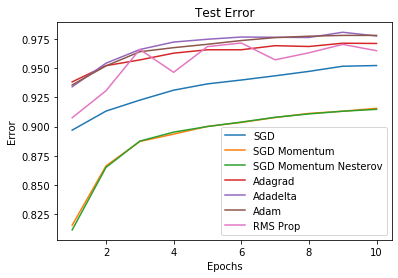

In [14]:
x = range(1, n_epochs+1)
plt.plot(x, sgd_errors, label="SGD")
plt.plot(x, sgd_momentum_errors, label="SGD Momentum")
plt.plot(x, sgd_momentum_nesterov_errors, label="SGD Momentum Nesterov")
plt.plot(x, adagrad_errors, label="Adagrad")
plt.plot(x, adadelta_errors, label="Adadelta")
plt.plot(x, adam_errors, label="Adam")
plt.plot(x, rmsprop_errors, label="RMS Prop")

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Test Error")
plt.legend()

plt.show()

### The accuracy of each optimizer is shown in the plot above

In [16]:
accuracies = {
    'SGD': sgd_errors[-1],
    'SGD Momentum': sgd_momentum_errors[-1],
    'SGD Momentum Nesterov': sgd_momentum_nesterov_errors[-1],
    'Adagrad': adagrad_errors[-1],
    'Adadelta': adadelta_errors[-1],
    'Adam': adam_errors[-1],
    'RMS Prop': rmsprop_errors[-1],
}
print("Accuracies: ")
for key in accuracies:
    print(f'Accuracy for {key}: {accuracies[key]*100}%')

Accuracies: 
Accuracy for SGD: 95.22%
Accuracy for SGD Momentum: 91.56%
Accuracy for SGD Momentum Nesterov: 91.47%
Accuracy for Adagrad: 97.11%
Accuracy for Adadelta: 97.75%
Accuracy for Adam: 97.8%
Accuracy for RMS Prop: 96.49%


To compare the optimizers, I ran all the mentioned optimizers instead of any three.

The hyperparameters I choose are:
  - 0.5 momentum for SGD with momentum and for nesterov.
  - Default parameters for the rest (element-wise lr optimizers).

### From these results, Adadelta and Adam seem to perform the best.